## Analisis de datos y Estadistica del juego

## Porcentaje de partidas por estado

#####  1. Importacion de las librerias necesarias para el procesamiento de los datos

In [70]:
import pandas as pd
import os
from matplotlib import pyplot as plt
from config import ESTADISTICA_ROOT, USUARIOS_ROOT
from datetime import datetime


##### 2. Obtencion de la informacion.
Se crea un dataframe mediante la apertura del archivo csv con pandas.

En una variable se guarda una lista con los datos para el dibujo del grafico de torta. Provenientes de las cantidades agrupadas por cada estado: "abandonada", "timeout", "ok", "finaliza", "error". (Inicialmente la lista contiene tambien la cantidad de estado "-" que corresponden a la marca en blanco para el evento de inicio de partida en el csv, pero este se deja fuera del grafico al pasarse como parametro al plot una sublista de la lista original de todos los estados).

Se crea una lista con las etiquetas necesarias usando las keys y filtrando la anteriormente mencionada "-" (correspondiente al evento de inicio de partida).

Adicional: se guarda en una lista las etiquetas con sus respectivos porcentajes para mostrar luego en las leyendas del plot 

In [71]:
data_frame = pd.read_csv(os.path.join(ESTADISTICA_ROOT, 'historial_partidas.csv'), sep=',', encoding="utf-8")

cantidad_por_estado = data_frame.groupby('estado').size()

etiquetas = list(map(lambda nom: nom.title(), filter(lambda nom : nom != '-' ,cantidad_por_estado.keys())))
data_dibujo = list(cantidad_por_estado.values)

total = sum(cantidad_por_estado.values) - cantidad_por_estado["-"]
porcentajes = [f"{etiquetas[i]}: {round(data_dibujo[i+1] / total * 100,2)}%" for i in range(0,len(etiquetas))]


##### 3. Creacion del Grafico de torta
Se determinan los valores para los distintos atributos del grafico de torta a mostrar, se pasan las variables anteriormente generadas como los datos a mostrar y graficar.

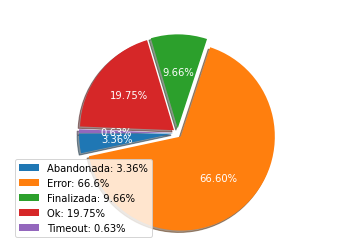

In [72]:
explode1=(0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(data_dibujo[1:len(data_dibujo)], explode=explode1 , labels=etiquetas, textprops={"color":"white"}, labeldistance=1.1, autopct='%1.2f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.legend(porcentajes)
plt.title("Porcentaje de partidas por estado", fontdict={"color":'white', "size":"15"})
plt.show()

## Porcentaje de partidas finalizadas segun genero

##### 1. Definicion de la funcion necesaria para el procesamiento

``` def chequear_generos(cantidad_finalizadas)``` Recibe el objeto generado a partir del dataframe que contiene todos los nombres con sus respectivas cantidades de partidas finalizadas.
A partir de esta estructura, se crea un diccionario con los 3 posibles generos que tiene la aplicacion y se levanta el archivo de usuarios.json que contiene la informacion de todos los usuarios. 
Se procesa la informacion iterando sobre los nombres del objeto recibido, utilizando el genero de dicho usuario como referencia y agregando al diccionario de generos en la clave que correspondiente al genero del usuario procesado, la cantidad de partidas finalizadas, totalizando asi por generos las partidas finalizadas. 
Devuelve el diccionario de generos con los totalizadores por cada uno de los 3 generos


In [73]:

def chequear_generos(cantidad_finalizadas):
    """ totaliza en un diccionario la cantidad de partidas finalizadas, chequeando el genero de cada usuario recibido en la estructura
    sumando en la key del diccionario generos la cantidad correspondiente al usuario con dicho genero"""
    generos = {"m":0,"f":0,"x":0}
    usuarios = pd.read_json(USUARIOS_ROOT,encoding="utf-8")
    for nom in cantidad_finalizadas.keys():
        try: # intenta buscar el usuario, si no fue borrado encuentra la calve, en otro caso no se toma para las estadisticas
            generos[usuarios[nom]['genero']] = generos[usuarios[nom]['genero']] + cantidad_finalizadas[nom] 
        except:
            pass
    return generos

##### 2. Obtencion de los datos y procesamiento por llamado a funcion.
En la variable ```data_dibujo``` se guarda la estructura retornada por la funcion ```chequear_generos(cantidad_finalizada)```. Se crea una variable para las etiquetas pasando a mayuscula todas las keys del diccionario anteriormente mencionado. 

Adicional: se guarda en una lista las etiquetas con sus respectivos porcentajes para mostrar luego en las leyendas del plot 

In [74]:
cantidad_finalizadas = data_frame[(data_frame['estado']=='finalizada')].groupby('usuario').size()
data_dibujo = chequear_generos(cantidad_finalizadas)
etiquetas = list(map(lambda elem: elem.upper(), data_dibujo.keys()))

total = sum(cantidad_finalizadas)
porcentajes = [f"{etiquetas[i]}: {round(data_dibujo[etiquetas[i].lower()] / total * 100,2)}%" for i in range(0,len(etiquetas))]


##### 3. Creacion del grafico de torta

Se determinan los valores para los distintos atributos del grafico de torta a mostrar, se pasan las variables anteriormente generadas como los datos a mostrar y graficar.

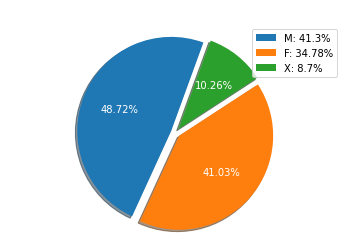

In [75]:
explode1=(0.05, 0.05, 0.05)
plt.pie(data_dibujo.values(), explode=explode1 , labels=etiquetas, textprops={"color":"white"}, labeldistance=1.1, autopct='%1.2f%%', shadow=True, startangle=70)
plt.axis('equal')
plt.legend(porcentajes)
plt.title("Porcentaje de partidas por estado", fontdict={"color":'white', "size":"15"})
plt.show()

## Porcentaje de partidas finalizadas segun nivel

##### 1. Obtencion de la informacion.


En una variable se guarda una lista con los datos para el dibujo del grafico de torta. Provenientes de las cantidades agrupadas por cada nivel: "facil", "normal", "dificil", "experto", "personalizado" del dataframe.

Se crea una lista con las etiquetas necesarias usando las keys.

Adicional: se guarda en una lista las etiquetas con sus respectivos porcentajes para mostrar luego en las leyendas del plot 


In [76]:
cantidad_finalizadas = data_frame[(data_frame['estado']=='finalizada')].groupby('nivel').size()
etiquetas = list(map(lambda elem: elem.title(), cantidad_finalizadas.keys()))
data_dibujo = list(cantidad_finalizadas.values)

total = sum(cantidad_finalizadas)
porcentajes = [f"{etiquetas[i]}: {round((data_dibujo[i] / total * 100 ),2)}%" for i in range(0,len(etiquetas))]


##### 2. Creacion del grafico de torta

Se determinan los valores para los distintos atributos del grafico de torta a mostrar, se pasan las variables anteriormente generadas como los datos a mostrar y graficar.

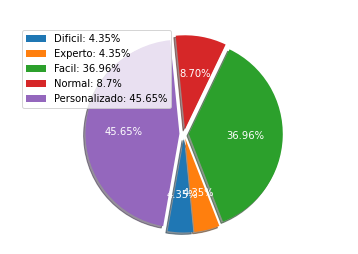

In [77]:
explode1=(0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(data_dibujo, explode=explode1 , labels=etiquetas, textprops={"color":"white"}, labeldistance=1.1, autopct='%1.2f%%', shadow=True, startangle=260)
plt.axis('equal')
plt.legend(porcentajes)
plt.title("Porcentaje de partidas por estado", fontdict={"color":'white', "size":"15"})
plt.show()

## Duracion total de la partida

Procesamiento para el calculo y analisis desde que el usuarie empieza a jugar hasta que presiona salir o pasan las N rondas definidas para el nivel de dificultad actual.

##### 1. Definicion de la funcion que ayudara a obtener el tiempo de cada partida

```def obtener_tiempo_partida(duracion_partidas)``` Recibe una serie porcion del dataframe filtrado, que contenta solo los eventos de inicio y fin de partida para cada id de partida junto con el usuario, el nivel y los timestamps correspondientes.
En una estructura auxiliar (diccionario con listas adentro), a medida que se itera sobre cada uno de los id de partida se ira guardando en las listas los id, nombre de usuario, nivel y el tiempo(diferenca entre timestamp de fin y timestamp de inicio), en su correlativo orden para luego construir un nuevo dataframe a partir de estas listas.

La funcion retorna dicha estructura

In [78]:
def obtener_tiempo_partida(duracion_partidas):
    """Recibe una serie porcion del dataframe filtrado, que contenta solo los eventos de inicio y fin de partida para cada id de partida junto con el usuario, el nivel y los timestamps correspondientes.
    En una estructura auxiliar (diccionario con listas adentro), a medida que se itera sobre cada uno de los id de partida se ira guardando en las listas los id, nombre de usuario, nivel y el tiempo(diferenca entre timestamp de fin y timestamp de inicio), en su correlativo orden para luego construir un nuevo dataframe a partir de estas listas.
    """
    datos = {"id_partida":[],"nombre":[],"nivel":[],"tiempo":[]}
    for id_partida in list(map(lambda num: int(num), duracion_partidas.id.unique())):
        inicio = duracion_partidas[duracion_partidas['id']==id_partida].iloc[0].timestamp
        fin = duracion_partidas[duracion_partidas['id']==id_partida].iloc[1].timestamp
        tiempo = (datetime.fromtimestamp(fin) - datetime.fromtimestamp(inicio)).total_seconds()
        datos["id_partida"].append(id_partida)
        datos["nombre"].append(duracion_partidas[duracion_partidas['id']==id_partida].iloc[0].usuario)
        datos["nivel"].append(duracion_partidas[duracion_partidas['id']==id_partida].iloc[0].nivel)
        datos["tiempo"].append(tiempo)
    return datos

##### 2.Obtencion de la informacion necesaria

Se filtra el dataframe quedandose asi con aquellos eventos que solo sean "inicio_partida" y "fin". Luego se dejan solo las columnas de 'id','timestamp', 'evento', 'usuario','nivel' que seran las que se mostran luego del procesamiento.

En la variable ```total_partidas``` se guarda el retorno de la funcion anteriormente explicada pasando por parametro la porcion del dataframe que se filtro con los datos de interes.

Se crea un nuevo dataframe con las cuatro columnas a mostrar anteriormente mencionadas y se asigna a cada una de las columnas los valores de las listas obtenidas de la estructura diccionario de retorno de la funcion. 

Luego se deja ```df``` al final para que al ejecutar la celda del jupyter notebook se muestre el dataframe generado con los datos de los tiempos de duracion total de cada partida.

In [79]:

duracion_partidas = data_frame[(data_frame['evento'] != 'intento')]
duracion_partidas = duracion_partidas[['id','timestamp', 'evento', 'usuario','nivel']]

total_partidas = obtener_tiempo_partida(duracion_partidas)
df = pd.DataFrame()
df['id_partida'] = total_partidas["id_partida"]
df['usuario'] = total_partidas["nombre"]
df['nivel'] = total_partidas["nivel"]
df['tiempo'] = total_partidas["tiempo"]


df

,id_partida,usuario,nivel,tiempo
0,1,Eduardo,personalizado,19.0
1,2,Eduardo,personalizado,49.0
2,3,Bruna,normal,6.0
3,4,Bruna,normal,8.0
4,5,Lautaro,experto,20.0
...,...,...,...,...
57,58,Gema,normal,32.0
58,59,Lucia,normal,2.0
59,60,Antonela,dificil,13.0
60,61,Jorge,facil,2.0


##  Tiempo de LA respuesta exitosa más rápida.



``` def obtener_tiempo(filtrado):``` Recibe el dataframe filtrado que contiene el inicio de partida de cada id unico y las respuestas correctas que tenga, nos quedamos con el tiempo de LA primer respuesta correcta, despues restamos ese tiempo con el tiempo de inicio de la partida.

Devuelve un diccionario con los datos id_partida, usuario y tiempo correspondiente a la respuesta exitosa mas rapida

Si el jugador abandono antes de seleccionar una opcion correcta, no se toma en consideracion y se omite esa partida.


In [80]:
def obtener_tiempo(filtrado):
    """ Obtener_tiempo es una funcion que recibe el dataframe filtrado, y Devuelve un diccionario con los datos id_partida, usuario y tiempo correspondiente a la respuesta exitosa mas rapida"""
    datos = {"id_game":0, "nombre":"", "tiempo":99999}
    for id_partida in list(map(lambda num: int(num), filtrado.id.unique())):
        if len(filtrado[filtrado['id']==id_partida]) > 1:
            inicio = filtrado[filtrado['id']==id_partida].iloc[0].timestamp
            fin = filtrado[filtrado['id']==id_partida].iloc[1].timestamp
            tiempo = (datetime.fromtimestamp(fin) - datetime.fromtimestamp(inicio)).total_seconds()
            if tiempo < datos["tiempo"]:
                datos["id_game"] = id_partida
                datos["nombre"] = filtrado[filtrado['id']==id_partida].iloc[0].usuario
                datos["tiempo"] = tiempo
    return datos

In [81]:
values_in = ['intento','inicio_partida']
values_out = ['timeout', 'error']
filtrado = data_frame[data_frame.evento.isin(values_in) & ~data_frame.estado.isin(values_out)] 
datos = obtener_tiempo(filtrado)

print(f' {datos["nombre"]}, id_game:{datos["id_game"]} fue el jugador con la respuesta mas rapida con una velocidad de {datos["tiempo"]} segundos')



 Eduardo, id_game:2 fue el jugador con la respuesta mas rapida con una velocidad de 1.0 segundos


## Promedio de tiempo de respuesta para respuestas exitosas

``` def obtener_tiempo_mas_rapido(filtrado):``` Recibe el dataframe filtrado que contiene el inicio de partida de cada id unico y las respuestas correctas que tenga, nos quedamos con el tiempo de la primer respuesta correcta, despues restamos ese tiempo con el tiempo de inicio de la partida

Si el jugador abandono antes de seleccionar una opcion correcta, no se toma en consideracion y se omite esa partida.


La funcion retorna una lista que se utiliza en el dataframe.

Para calcular el promedio de tiempo para las respuestas exitosas, utilizamos la funcion 'mean()' que calcula el promedio del dataframe que obtenemos de la funcion obtener_tiempo_mas_rapido.

In [82]:
def obtener_tiempo_mas_rapidos(filtrado):
    """Retorna un dicc, que contiene un String y una lista, que se guarda el tiempo promdeio de cada respuesta exitosa """
    datos = {"id_game":[], "nombre":[], "tiempo":[]}
    for id_partida in list(map(lambda num: int(num), filtrado.id.unique())):
        if len(filtrado[filtrado['id']==id_partida]) > 1:
            inicio = filtrado[filtrado['id']==id_partida].iloc[0].timestamp
            fin = filtrado[filtrado['id']==id_partida].iloc[1].timestamp
            tiempo = (datetime.fromtimestamp(fin) - datetime.fromtimestamp(inicio)).total_seconds()
            datos["id_game"].append(id_partida)
            datos["nombre"].append(filtrado[filtrado['id']==id_partida].iloc[0].usuario)
            datos["tiempo"].append(tiempo)
    return datos

Primero filtramos el dataframe, con una variable (values_in) que son los valores que queremos dejar en el data frame, y (valoues_out) que son los valores que queremos eliminar.

Despues se llama a la funcion obtener_tiempo_mas_rapidos, mandandole como parametro el filtrado que hicimos anteriormente, que retorna un diccionario, y lo convertimos a dataframe para despues imprimirlo.

alfinal del dataframe, se agrega una fila general que indica el promedio general de todas las partidas.

In [83]:
values_in = ['intento','inicio_partida']
values_out = ['timeout', 'error']
filtrado = data_frame[data_frame.evento.isin(values_in) & ~data_frame.estado.isin(values_out)] 
data = obtener_tiempo_mas_rapidos(filtrado)



df = pd.DataFrame()
df['id_game'] = data["id_game"]
df['usuario'] = data["nombre"]
df['tiempo'] = data["tiempo"]
fila_promedio_general = {'id_game':'', 'usuario':'Promedio General: ', 'tiempo':(round(df['tiempo'].mean(), 2))}
df = df.append(fila_promedio_general, ignore_index=True)

df

C:\Users\felay\AppData\Local\Temp\ipykernel_10660\4597344.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(fila_promedio_general, ignore_index=True)


,id_game,usuario,tiempo
0,1,Eduardo,3.00
1,2,Eduardo,1.00
2,4,Bruna,3.00
3,6,Lucia,6.00
4,7,Lucia,2.00
5,8,Lautaro,16.00
6,9,Damian,10.00
7,11,Marian,66.00
8,12,Joaquin,7.00
9,13,Joaquin,4.00


# Promedio de tiempo de partida general.
    Se reutilizan los filtrados de duracion_partidas y la funcion de obtener_tiempo partida. Utilizamos dos variables (tiempo_total y cant_partidas) para mayor legibilidad del codigo y informamos en un format la cantidad de segundos que dura una partida promedio.

In [84]:
duracion_partidas = data_frame[(data_frame['evento'] != 'intento')]
duracion_partidas = duracion_partidas[['id','timestamp', 'evento', 'usuario','nivel']]
total_partidas = obtener_tiempo_partida(duracion_partidas)
df = pd.DataFrame()

tiempo_total = sum(total_partidas["tiempo"])
cant_partidas = len(total_partidas["tiempo"])

print(f'El tiempo promedio por partida es: { round(tiempo_total/cant_partidas, 2)}  segundos')

El tiempo promedio por partida es: 22.26  segundos


# Porcentaje de aciertos por Usuarie
```def porcentaje_aciertos(aciertos_ordenados):```  Es una funcion la cual agarra un DataFrame ya previamente ordenado alfabeticamente y filtrado por la columna evento. Recorre este DataFrame por nombre, sacando el total de respuestas del usuarie en todas sus partidas y las divide por la cantidad que tenga correcta (si no tiene ninguna correcta se devuelve directamente cero como nota de promedio). Finalmente la funcion devuelve dos listas, las cuales son el promedio de cada usuario y su nombre. Por posicion son incluidos en un DataFrame e impresos.

In [85]:
def porcentaje_aciertos(aciertos_ordenados):
    """ Es una funcion la cual recibe el dataframe ordenado,  y retorna dos listas las cuales son el promedio de cada usuario y su nombre"""
    df_usuarios = []
    df_promedios = []
    for nombre in list(aciertos_ordenados.usuario.unique()):
        usu_act = aciertos_ordenados[aciertos_ordenados['usuario'] == nombre]
        tot = sum(usu_act.groupby("estado").size().values)
        usu_act = dict(usu_act.groupby("estado").size())
        df_usuarios.append(nombre)
        if "ok" in usu_act.keys():
            df_promedios.append( f' {round(usu_act["ok"]/tot*100, 1 )}%' )
        else: #-> en caso de que no haya ninguna respuesta correcta
            df_promedios.append(0)
    return df_usuarios,df_promedios

Se agarra el dataframe original, se filtra por el evento que sea un intento, despues lo ordenamos por usuario con la funcion 'sort' y llamamos a la funcion porcentaje_aciertos() este nos retorna dos listas, las cuales ponemos en el dataframe recien generado en dos columnas.

In [86]:
aciertos = data_frame[ (data_frame["evento"] == 'intento')]
aciertos_ordenados = aciertos.sort_values(by="usuario")
usuarios, promedios  = porcentaje_aciertos(aciertos_ordenados)
df = pd.DataFrame()
df['usuario'] = usuarios
df["promedios_aciertos"] = promedios

df

,usuario,promedios_aciertos
0,Antonela,25.0%
1,Bruna,25.0%
2,Damian,30.0%
3,Eduardo,20.0%
4,Ezequiel,22.2%
5,Francisca,20.0%
6,Franco,0
7,Franquito Dosan,40.0%
8,Gema,10.0%
9,Joaquin,16.7%


# Cantidad de tarjetas para las que el usuarie no dió respuesta (timeout)

Se utiliza el data frame del historial de partida. Luego se filtran por los datos en el cual el estado es 'timeout' para solo quedarnos con los que no llegaron a responder y se les terminó el tiempo.

Después se utiliza el método ```groupby('usuario')['estado'].count()```, provisto por Pandas, en el que le enviamos como parámetro el nombre de la columna 'usuario' que utilizaremos para agrupar, eso aplicado a la columna 'estado, y a eso le aplicamos 'count'.

Count se utiliza para saber la cantidad de veces que el usuario no dio respuesta (timeout) y nos los guarda en el dataframe df_timeout.

In [87]:
filtrado = data_frame[(data_frame['estado'] == 'timeout')]
df_timeout = pd.DataFrame(filtrado.groupby('usuario')['estado'].count())
df_timeout.rename(columns= {'estado':'Cant_no_respuestas'}, inplace=True)
df_timeout

,Cant_no_respuestas
usuario,
Eduardo,1
Lautaro,1
Lucia,1


# Cantidad de Tarjetas en las que el Usuarie dio una respuesta erronea
     Esto reutiliza el codigo del ejercicio anterior ya que solo es modificiar el criterio por el cual se filtra el dataframe.

In [88]:
filtrado = data_frame[(data_frame['estado'] == 'error')]
df_error = pd.DataFrame(filtrado.groupby('usuario')['estado'].count())

df_error.rename(columns= {'estado':'Cant_errores'}, inplace=True)
df_error

,Cant_errores
usuario,
Antonela,15
Bruna,9
Damian,28
Eduardo,43
Ezequiel,14
Francisca,4
Franco,5
Franquito Dosan,3
Gema,9


##  Top 10 palabras que se encuentran primero en todas las partidas

``` def seleccion_primeras(df)``` la funcion nos devuelve una lista que selecciona del dataFrame la primera carta(respuesta) de cada partida.

En el caso de que se juege una partida y no se inicie (No se genera ninguna primera carta) estos casos son descartados, y no se toman en cuenta

In [89]:
def seleccio_primeras(df):
    """Selecciona del DataFrame las primeras respuestas"""
    lst_frst = []
    for id_partida in list(map(lambda num: int(num), df.id.unique())):
        lst_frst.append(df[df['id']==id_partida].iloc[1].respuesta)
    return lst_frst

Creamos una lista_first_card, que nos devuelve una lista filtrada del dataFrame con la primera carta de cada partida (ya sea correcta o erronea la respuesta del usuario, como indica el enunciado: "● Top 10 de palabras que se encuentran primero de todas las partidas." en la cual no se especifica que tiene que ser correctas, sino que es la primera carta que se encuentra de cada partida).

Despues filtramos esa lista, eliminandole los guiones, que eso indica que en esa partida no se genero ninguna carta.

Iteramos la lista convirtiendola en un diccionario con la funcion zip() teniendo como key el nombre de la carta, y como valor la cantidad de veces que salio primera en cada partida.}

Finalmente utilizamos la funcion sorted iterando los items del diccionario para ordenar el diccionario de mayor a menos y nos quedamos en el nuevo dataframe el diccionario desde la posicion 0(cartaMasComun) hasta la posicion 9 (Top10 Primeras cartas, de cada partida).

In [90]:

lista_first_card = seleccio_primeras(data_frame)
lista_first_card = list(filter(bool, map(lambda x : x if x!= '-' else False, lista_first_card))) # -> saca los espacios con "-" que peuden llegar a surgir
diccionario_first_card = dict(zip(lista_first_card , map(lambda x: lista_first_card.count(x),lista_first_card))) # -> itera la lista, convirtiendola 
sortedDict = sorted(diccionario_first_card.items(), key=lambda x: x[1], reverse=True)
df = pd.DataFrame(sortedDict[0:10])
df.columns = ['Cartas', 'Cant repetida 1° Preg']
df

,Cartas,Cant repetida 1° Preg
0,Lago Pellegrini,2
1,Selena Gomez,2
2,Foster The People,2
3,Kastriot Imeri,1
4,Matías Pérez,1
5,DJ Khaled,1
6,Noah And The Whale,1
7,Lago Posadas,1
8,Emanuele Cicerelli,1
9,Lago Azara,1
